In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

%matplotlib inline

In [2]:
def update_velocity(v,a,t):
    # args: v - array vx, vy, vz
    #       a - array ax, ay, az
    #       t - time step
    # returns new_v - array new vx,vy,vz
    new_v = v
    new_v[0] = v[0] + a[0]*t
    new_v[1] = v[1] + a[1]*t
    new_v[2] = v[2] + a[2]*t
    return new_v

In [3]:
def update_pos(pos,v,t):
    # args: pos - array posx, posy, posz
    #       v - array vx, vy, vz
    #       t - time step
    # returns new_pos - array new posx, posy, posz
    new_pos = pos
    new_pos[0] = pos[0] + v[0]*t
    new_pos[1] = pos[1] + v[1]*t
    new_pos[2] = pos[2] + v[2]*t
    return new_pos

In [4]:
def read_csv(filename):
    """
    Reads a csv file and returns the first 20 recordings from the file
    Input:
        filename: csv filename
    Output:
        data: a 20x66 matrix corresponding to the first 20 readings in the csv file. Each row corresponds
            to a reading; the first 33 values are x-coordinates while the second33 values are y-coordinates
    """
    data = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for i,row in enumerate(reader):
            if(row):
                if (data == []):
                    data = np.array([float(i) for i in row]).T
                else:
                    data = np.vstack((data, (np.array([float(i) for i in row]).T)))
    return data

In [5]:
data = read_csv('test_circle.csv')

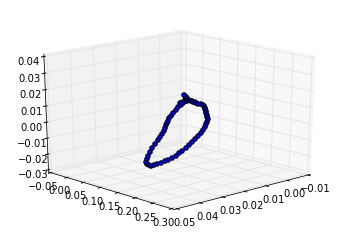

In [19]:
ax = data[:,0] #np.random.rand(10) # x accel for time step 0, 1, 2, ...
ay = data[:,1] #np.random.randn(10) # y accel
az = data[:,2] #np.random.randn(10) # z accel

pos = v = np.zeros((3,1))
x = y = z = 0 # current position
vx= vy= vz = 0 # current velocity

a = np.zeros((3,1))

xo= yo= zo = 0 # initial position

t = 0.01 # sampling period

fig = plt.figure()
figA = fig.add_subplot(111, projection = '3d')

for i in range(len(ax)):
    # update velocity
    vx = vx + ax[i]*t
    vy = vy + ay[i]*t
    vz = vz + az[i]*t
    # update position
    xOld = x
    yOld = y
    zOld = z
    x = x + vx*t
    y = y + vy*t
    z = z + vz*t
    
    figA.scatter(x,y,z)
    figA.plot([xOld,x],[yOld,y],[zOld,z])
    figA.view_init(elev=20, azim=47)
    



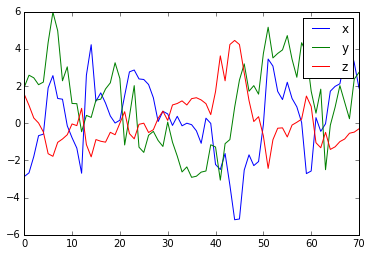

In [7]:
plt.plot(ax)
plt.plot(ay)
plt.plot(az)
plt.legend(['x','y','z'])